In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [2]:
basee = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-shelf/mwipg-testing'
def open_files(label):
    base = basee 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog
def open_IC(label):
    base = basee 
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC
def open_visc(label):
    base = basee 
    IC = xr.open_dataset(base + '/visc-'+label+'.nc')
    return IC

basee2 = '/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-shelf/archive'
def open_filesold(label):
    base = basee2 
    prog = xr.open_dataset(base + '/prog-'+label+'.nc')
    return prog
def open_ICold(label):
    base = basee2
    IC = xr.open_dataset(base + '/MOM_IC-'+label+'.nc')
    return IC


In [3]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_files(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_IC(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


In [4]:
def plotold(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog = open_filesold(label)
    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
    IC = open_ICold(label)
    depth = grid.interp(prog.e,"x")
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu") or (varname == "visc_rem_u"): 
        dataplot = grid.interp(dataplot,"x")
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


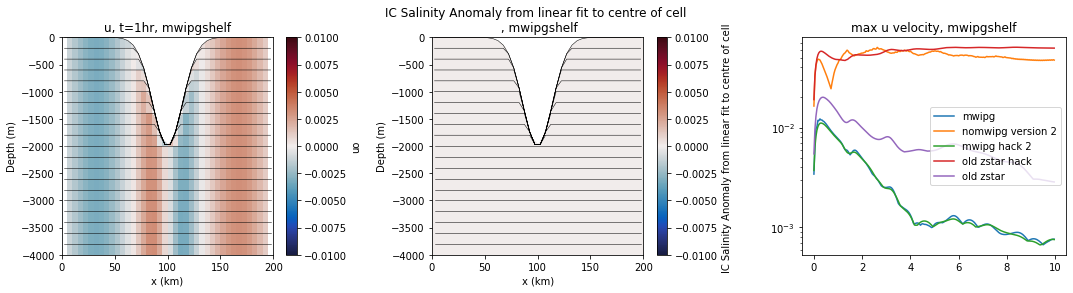

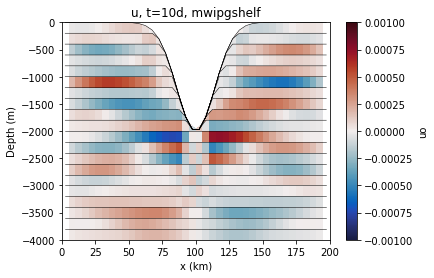

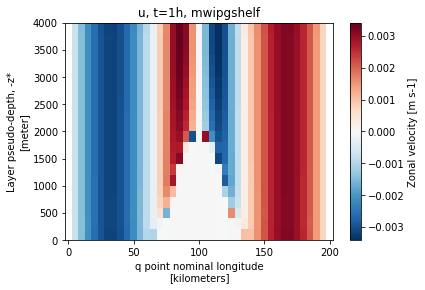

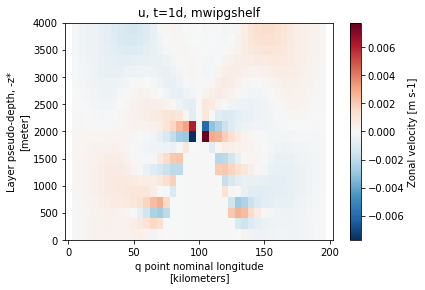

Text(0.5, 1.0, 'u, t=10d, nomwipgshelf-2')

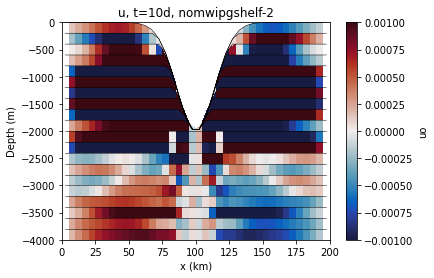

In [45]:
label = 'mwipgshelf'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[2].set_title('max u velocity, '+label)
prog2 = open_files('nomwipgshelf')
#axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'nomwipg')
prog2 = open_files('nomwipgshelf-2')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'nomwipg version 2')
prog2 = open_files('mwipgshelf-hack2')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'mwipg hack 2')
prog2 = open_filesold('zstar-hack')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'old zstar hack')
prog2 = open_filesold('zstar')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'old zstar')

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

label = 'mwipgshelf'

fig, axes = plt.subplots()
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes,x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes.set_title('u, t=10d, '+label)
plt.show()
fig, axes = plt.subplots()
prog.u.isel(yh = 0, Time = 0).plot(ax = axes)
axes.set_title('u, t=1h, '+label)
plt.show()
fig, axes = plt.subplots()
prog.u.isel(yh = 0, Time = 24).plot(ax = axes)
axes.set_title('u, t=1d, '+label)
plt.show()

label = 'nomwipgshelf-2'

fig, axes = plt.subplots()
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes,x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes.set_title('u, t=10d, '+label)


No handles with labels found to put in legend.


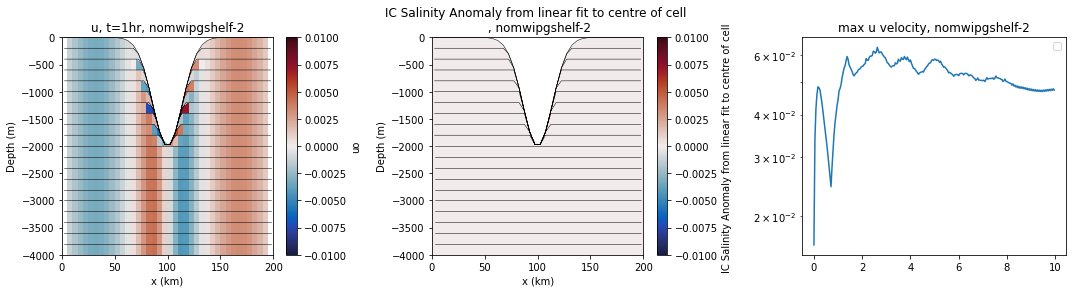

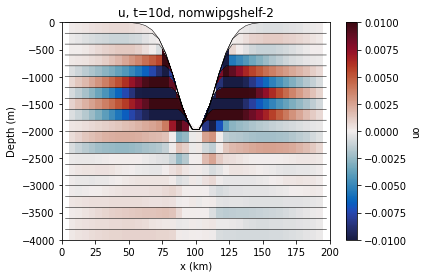

In [61]:
label = 'nomwipgshelf-2'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance, ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values,)
axes[2].set_title('max u velocity, '+label)
axes[2].legend()
axes[2].set_yscale('log')

fig.subplots_adjust(wspace = 0.4)
plt.show()

label = 'nomwipgshelf-2'

fig, axes = plt.subplots()
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes,x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes.set_title('u, t=10d, '+label)
plt.show()


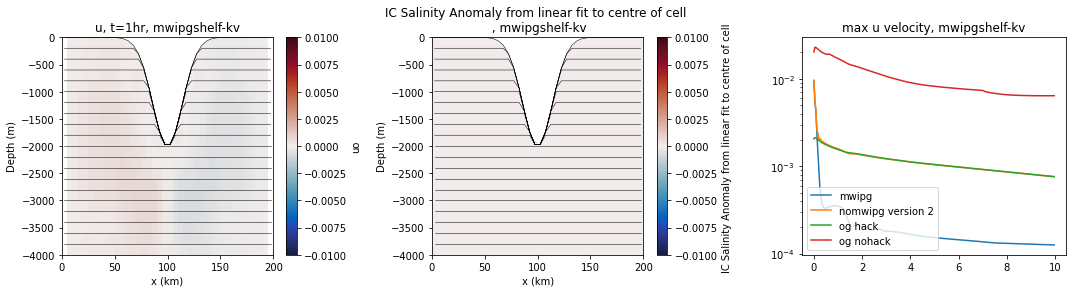

In [33]:
label = 'mwipgshelf-kv'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 5 #24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

prog = open_files(label)
IC = open_IC(label)
time = 0
#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[2].set_title('max u velocity, '+label)
prog2 = open_files('nomwipgshelf-kv')
#axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'nomwipg')
prog2 = open_files('nomwipgshelf-kv2')
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'nomwipg version 2')
label = 'zstar-isomip-hack-drag-kvbig-symshelf_v2'
prog = open_filesold(label)
axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'og hack')
label = 'zstar-isomip-drag-kvbig-symshelf_v2'
prog = open_filesold(label)
axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'og nohack')

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)

Adding MWIPG (first version didn't set default isWeightToggle = 0) reduces max velocities by an order of magnitude. Still not seamount levels (imperfect initialization but way better - 1e-4 would be acceptable for ice shelf)

No handles with labels found to put in legend.


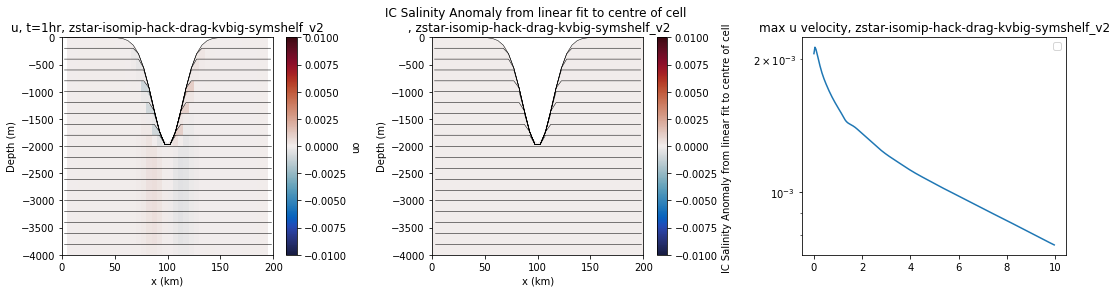

In [9]:
label = 'zstar-isomip-hack-drag-kvbig-symshelf_v2'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_filesold(label)
IC = open_ICold(label)
x = 0
time = 0#24*5-1
ymax = 4000
plotold(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance, ymax)
axes[0].set_title('u, t=1hr, '+label)

#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plotold(axes[1],x,time,0,IC.Salt-ideal_salt,"IC Salinity Anomaly from linear fit to centre of cell \n",-1e-2,1e-2,cm.cm.balance,ymax)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values)
axes[2].set_title('max u velocity, '+label)
axes[2].legend()
axes[2].set_yscale('log')

fig.subplots_adjust(wspace = 0.4)

In [34]:
def make_thickness_file(filename):
    
    ic = xr.open_dataset('MOM_IC.nc')
    _, nz, ny, nx = ic.h.data.shape

    new_thick = nc.Dataset(filename, "w", format="NETCDF4")
    new_thick.createDimension("nz", nz)
    new_thick.createDimension("ny", ny)
    new_thick.createDimension("nx", nx)
    new_thick.createVariable("h","f8",("nz","ny","nx"))

    new_thick["h"][:,:,:] = ic.h.data#*1035
    new_thick.close()

In [35]:
make_thickness_file('INPUT/zstar-isomip-symshelf-mwipg-nodrag.nc')

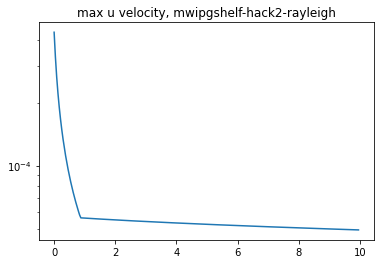

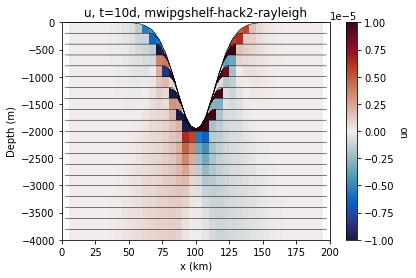

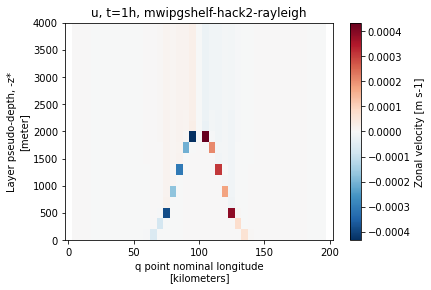

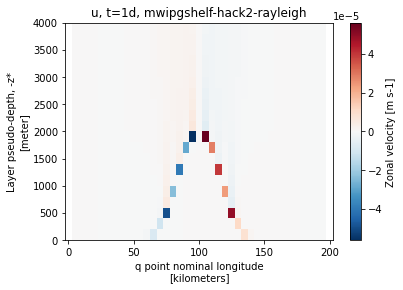

In [42]:
label = 'mwipgshelf-hack2-rayleigh'
plt.plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
plt.title('max u velocity, '+label)
plt.yscale('log')
plt.show()
fig, axes = plt.subplots()
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1#24*5-1
ymax = 4000
plot(axes,x,time,0,prog.u,"uo",-0.00001,0.00001,cm.cm.balance,ymax)
axes.set_title('u, t=10d, '+label)
plt.show()
fig, axes = plt.subplots()
prog.u.isel(yh = 0, Time = 0).plot(ax = axes)
axes.set_title('u, t=1h, '+label)
plt.show()
fig, axes = plt.subplots()
prog.u.isel(yh = 0, Time = 24).plot(ax = axes)
axes.set_title('u, t=1d, '+label)
plt.show()


calculate h on either side of these "problem" points?

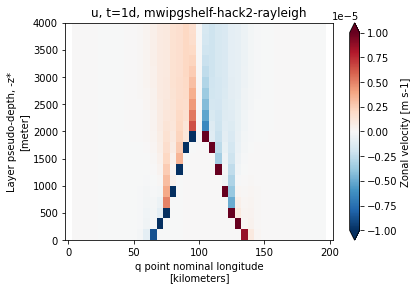

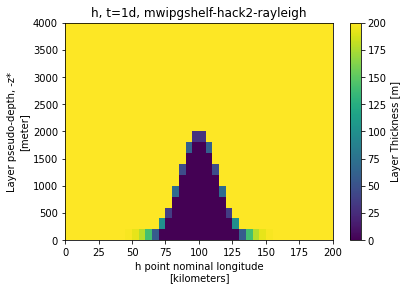

velocity at point zl = 1, xq = 14 = -1.1342103418359087e-05
h to left is 200.0
h to right is 97.702985267293
e at top to left is -200.0
e at top to right is -302.29701473270745
e at bottom to left is -400.0
e at bottom to right is -400.00000000000045
velocity at point zl = 2, xq = 15 = -4.914297010081505e-05
h to left is 199.99999999999997
h to right is 35.24816962692039
e at top to left is -400.00000000000045
e at top to right is -564.7518303730798
e at bottom to left is -600.0000000000005
e at bottom to right is -600.0000000000001
velocity at point zl = 4, xq = 16 = -2.3950102674928465e-05
h to left is 200.00000000000003
h to right is 68.91260640501964
e at top to left is -800.0000000000001
e at top to right is -931.08739359498
e at bottom to left is -1000.0000000000001
e at bottom to right is -999.9999999999997
velocity at point zl = 6, xq = 17 = -3.984262483416331e-05
h to left is 199.99999999999997
h to right is 45.32784122014974
e at top to left is -1199.9999999999995
e at top to

In [59]:
label = 'mwipgshelf-hack2-rayleigh'
prog = open_files(label)
prog.u.isel(yh = 0, Time = 24).plot(vmax = 1e-5)
plt.title('u, t=1d, '+label)
plt.show()
prog.h.isel(yh = 0, Time = 24).plot()
plt.title('h, t=1d, '+label)
plt.show()

us = prog.u.isel(yh = 0, Time = 24)#.values
hs = prog.h.isel(yh = 0, Time = 24)#.values
es = prog.e.isel(yh = 0, Time = 24)#.values

for i in np.arange(len(us.xq)):
    for k in np.arange(len(us.zl)):
        if (np.abs(us[k,i])>1e-5):
            print('velocity at point zl = '+str(k)+', xq = '+str(i)+' = '+str(us[k,i].values))
            print('h to left is '+str(hs[k,i-1].values))
            print('h to right is '+str(hs[k,i].values))
            print('e at top to left is '+str(es[k,i-1].values))
            print('e at top to right is '+str(es[k,i].values))
            print('e at bottom to left is '+str(es[k+1,i-1].values))
            print('e at bottom to right is '+str(es[k+1,i].values))
            

In [46]:
prog

<xarray.Dataset>
Dimensions:  (xq: 41, yh: 2, zl: 20, Time: 240, xh: 40, yq: 3, zi: 21)
Coordinates:
  * xq       (xq) float64 0.0 5.0 10.0 15.0 20.0 ... 185.0 190.0 195.0 200.0
  * yh       (yh) float64 32.5 37.5
  * zl       (zl) float64 100.0 300.0 500.0 700.0 ... 3.5e+03 3.7e+03 3.9e+03
  * Time     (Time) object 0001-01-01 01:00:00 ... 0001-01-11 00:00:00
  * xh       (xh) float64 2.5 7.5 12.5 17.5 22.5 ... 182.5 187.5 192.5 197.5
  * yq       (yq) float64 30.0 35.0 40.0
  * zi       (zi) float64 0.0 200.0 400.0 600.0 ... 3.6e+03 3.8e+03 4e+03
Data variables:
    u        (Time, zl, yh, xq) float64 nan -0.0008 -0.001552 ... -0.0001243 nan
    v        (Time, zl, yq, xh) float64 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float64 ...
    temp     (Time, zl, yh, xh) float32 ...
    salt     (Time, zl, yh, xh) float32 ...
    Rml      (Time, zl, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      GOLD Experiment
    grid_type:  regular
    grid_tile:  N/A

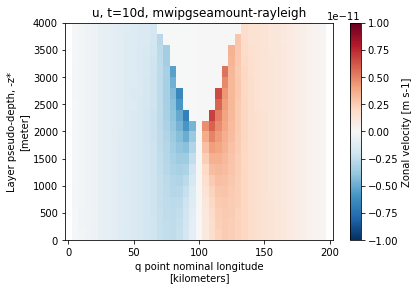

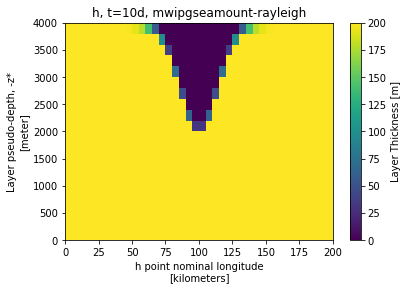

velocity at point zl = 15, xq = 16 = -5.418667746155271e-12
h to left is 200.00000000000006
h to right is 69.91362373188332
e at top to left is -3000.0000000000005
e at top to right is -3000.000000000001
e at bottom to left is -3200.0000000000005
e at bottom to right is -3069.9136237318844
velocity at point zl = 11, xq = 17 = -5.121576142979007e-12
h to left is 200.00000000000003
h to right is 199.99999999999991
e at top to left is -2200.000000000001
e at top to right is -2200.0
e at bottom to left is -2400.000000000001
e at bottom to right is -2400.0
velocity at point zl = 12, xq = 17 = -5.8014619715283716e-12
h to left is 200.00000000000009
h to right is 200.0000000000002
e at top to left is -2400.000000000001
e at top to right is -2400.0
e at bottom to left is -2600.000000000001
e at bottom to right is -2600.0
velocity at point zl = 13, xq = 17 = -6.550130831658278e-12
h to left is 200.0000000000001
h to right is 46.732307676536294
e at top to left is -2600.000000000001
e at top to 

In [70]:
label = 'mwipgseamount-rayleigh'
prog = open_files(label)
prog.u.isel(yh = 0, Time = -1).plot(vmax = 1e-11)
plt.title('u, t=10d, '+label)
plt.show()
prog.h.isel(yh = 0, Time = -1).plot()
plt.title('h, t=10d, '+label)
plt.show()

us = prog.u.isel(yh = 0, Time = -1)#.values
hs = prog.h.isel(yh = 0, Time = -1)#.values
es = prog.e.isel(yh = 0, Time = -1)#.values

for i in np.arange(len(us.xq)):
    for k in np.arange(len(us.zl)):
        if (np.abs(us[k,i])>5e-12):
            print('velocity at point zl = '+str(k)+', xq = '+str(i)+' = '+str(us[k,i].values))
            print('h to left is '+str(hs[k,i-1].values))
            print('h to right is '+str(hs[k,i].values))
            print('e at top to left is '+str(es[k,i-1].values))
            print('e at top to right is '+str(es[k,i].values))
            print('e at bottom to left is '+str(es[k+1,i-1].values))
            print('e at bottom to right is '+str(es[k+1,i].values))
            

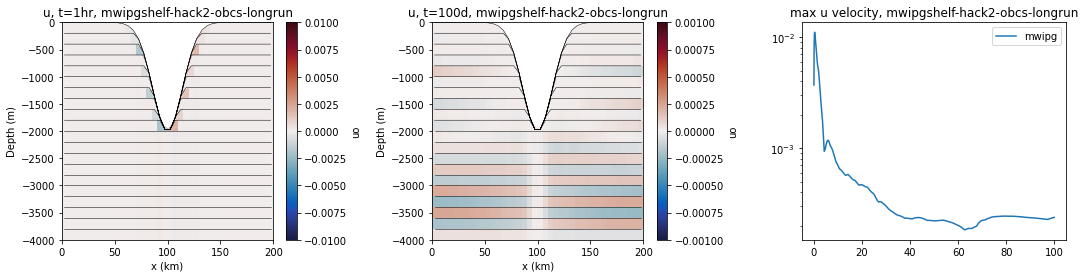

In [76]:
label = 'mwipgshelf-hack2-obcs-longrun'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

time = -1
plot(axes[1],x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes[1].set_title('u, t=100d, '+label)

axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[2].set_title('max u velocity, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()


/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


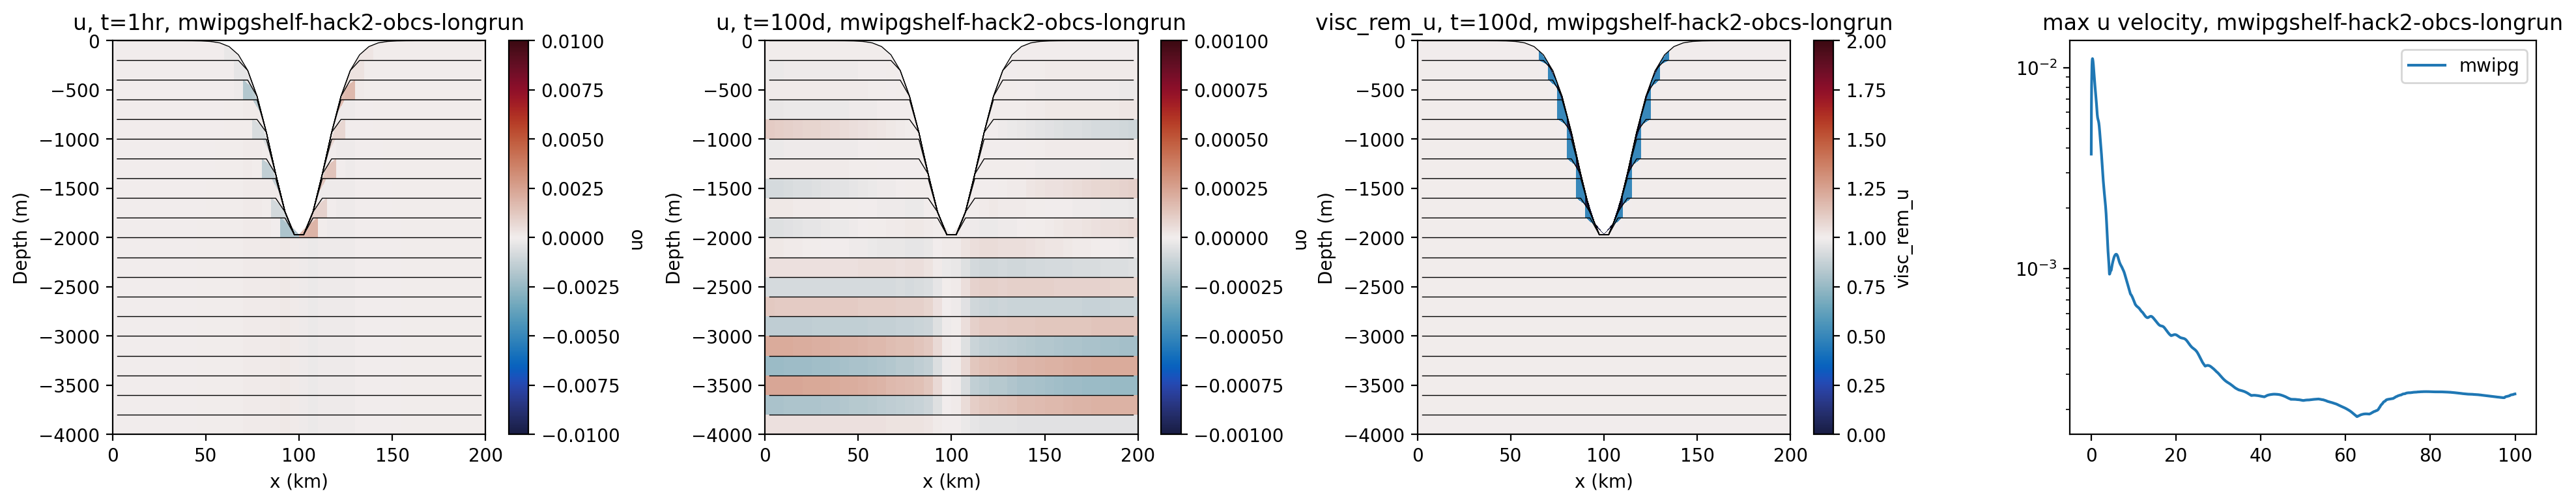

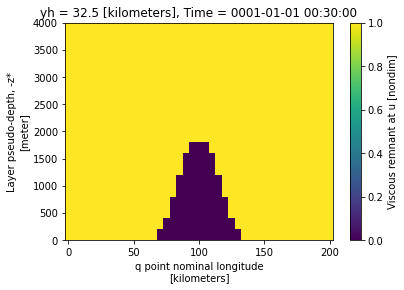

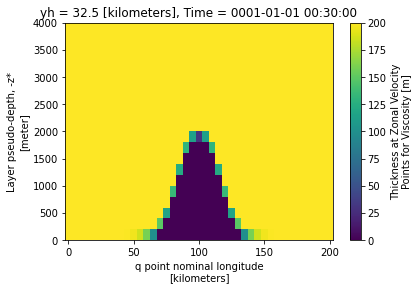

In [6]:
label = 'mwipgshelf-hack2-obcs-longrun'

fig, axes = plt.subplots(ncols = 4, figsize = (24,4),dpi=200)
prog = open_files(label)
IC = open_IC(label)
visc=open_visc(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

time = -1
plot(axes[1],x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes[1].set_title('u, t=100d, '+label)

plot(axes[2],x,time,0,visc.visc_rem_u,"visc_rem_u",0,2,cm.cm.balance,ymax)
axes[2].set_title('visc_rem_u, t=100d, '+label)


axes[3].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[3].set_title('max u velocity, '+label)

axes[3].legend()
axes[3].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

visc.visc_rem_u.isel(Time=0,yh=0).plot()
plt.show()
visc.Hu_visc.isel(Time=0,yh=0).plot()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: b'/Users/claireyung/mom6/MOM6-examples/ocean_only/ISOMIP/seamount-shelf/mwipg-testing/visc-mwipgseamount-obcs-longrun.nc'

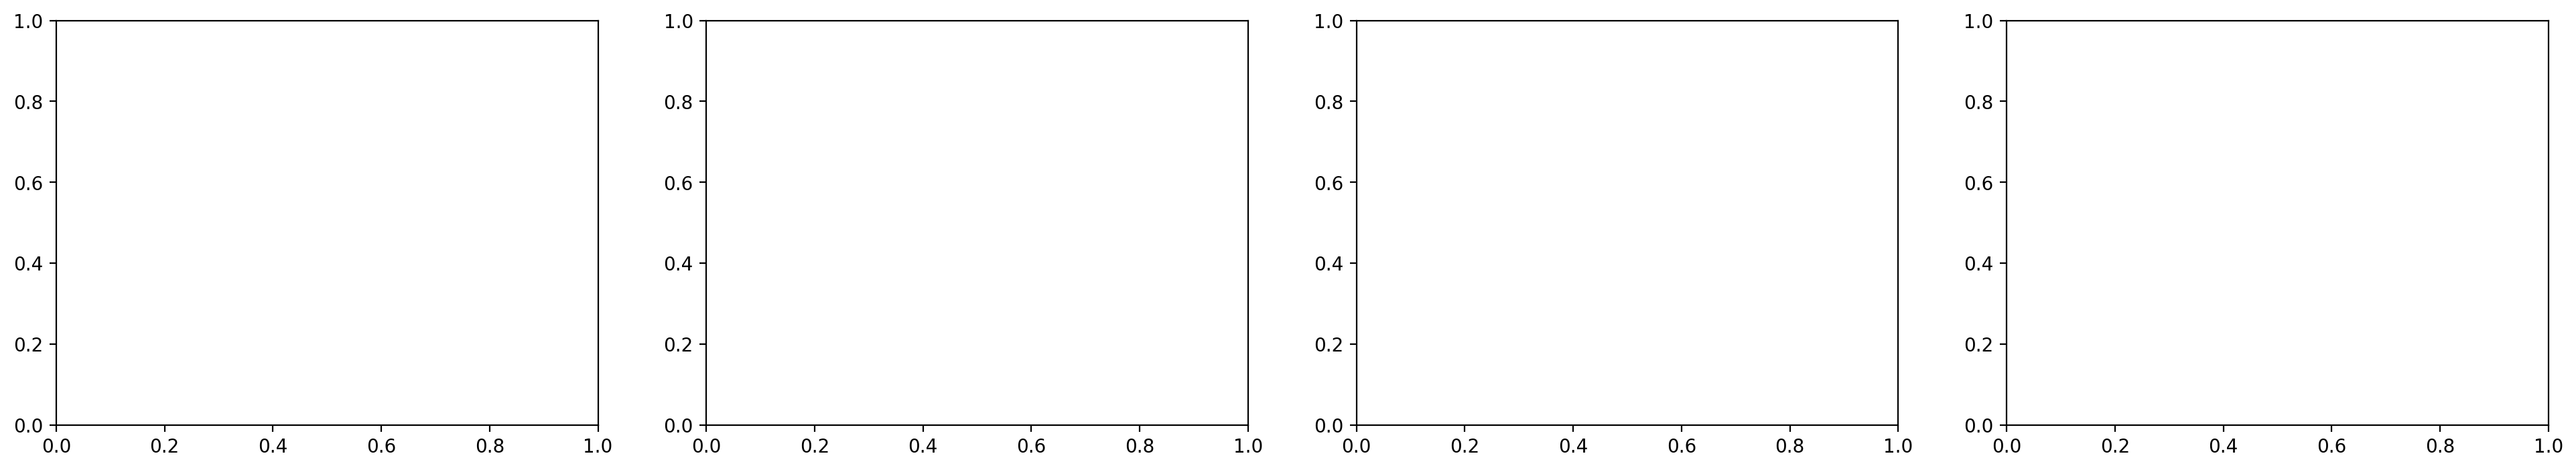

In [21]:
label = 'mwipgseamount-obcs-longrun'

fig, axes = plt.subplots(ncols = 4, figsize = (24,4),dpi=200)
prog = open_files(label)
IC = open_IC(label)
visc=open_visc(label)
x = 0
time = 0#24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.01,0.01,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)

time = -1
plot(axes[1],x,time,0,prog.u,"uo",-0.001,0.001,cm.cm.balance,ymax)
axes[1].set_title('u, t=100d, '+label)

plot(axes[2],x,time,0,visc.visc_rem_u,"visc_rem_u",0,2,cm.cm.balance,ymax)
axes[2].set_title('visc_rem_u, t=100d, '+label)


axes[3].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'mwipg')
axes[3].set_title('max u velocity, '+label)

axes[3].legend()
axes[3].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

visc.visc_rem_u.isel(Time=0,yh=0).plot()
plt.show()
visc.Hu_visc.isel(Time=0,yh=0).plot()
plt.show()


Now do upside down seamount

# now do sigma

In [11]:
def make_thickness_file(filename):
    
    ic = xr.open_dataset('MOM_IC.nc')
    _, nz, ny, nx = ic.h.data.shape

    new_thick = nc.Dataset(filename, "w", format="NETCDF4")
    new_thick.createDimension("nz", nz)
    new_thick.createDimension("ny", ny)
    new_thick.createDimension("nx", nx)
    new_thick.createVariable("h","f8",("nz","ny","nx"))

    new_thick["h"][:,:,:] = ic.h.data
    new_thick.close()

make_thickness_file('INPUT/sigma-isomip-symshelf-mwipg-nodrag.nc')

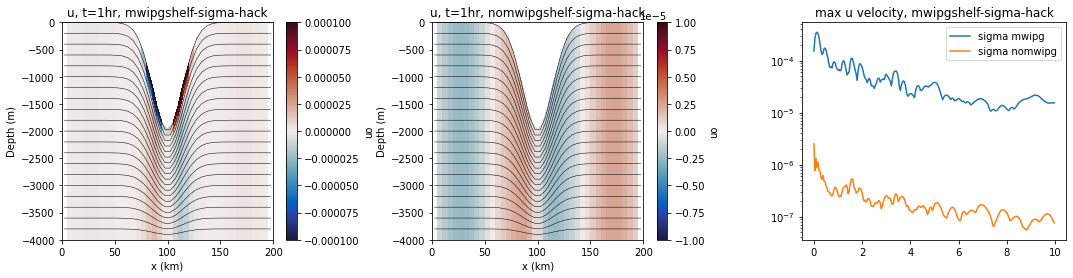

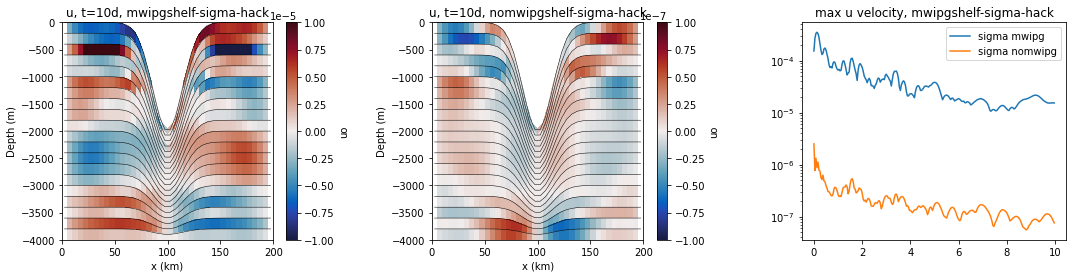

In [20]:
label = 'mwipgshelf-sigma-hack'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = 0 #24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.0001,0.0001,cm.cm.balance,ymax)
axes[0].set_title('u, t=1hr, '+label)


axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'sigma mwipg')
axes[2].set_title('max u velocity, '+label)

label = 'nomwipgshelf-sigma-hack'
prog2 = open_files(label)
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'sigma nomwipg')
prog = open_files(label)
IC = open_IC(label)
time = 0
#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,prog.u,"uo",-0.00001,0.00001,cm.cm.balance,ymax)
axes[1].set_title('u, t=1hr, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()

label = 'mwipgshelf-sigma-hack'

fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
prog = open_files(label)
IC = open_IC(label)
x = 0
time = -1 #24*5-1
ymax = 4000
plot(axes[0],x,time,0,prog.u,"uo",-0.00001,0.00001,cm.cm.balance,ymax)
axes[0].set_title('u, t=10d, '+label)


axes[2].plot(np.arange(len(prog.Time))/24, prog.u.max(['xq','yh','zl']).values, label = 'sigma mwipg')
axes[2].set_title('max u velocity, '+label)

label = 'nomwipgshelf-sigma-hack'
prog2 = open_files(label)
axes[2].plot(np.arange(len(prog.Time))/24, prog2.u.max(['xq','yh','zl']).values, label = 'sigma nomwipg')
prog = open_files(label)
IC = open_IC(label)
time = -1
#plot(axes[1],x,time,0,prog.salt,"salt",33.7,34.6,cm.cm.haline,ymax)
ideal_salt = xr.zeros_like(IC.Salt) + (IC.eta.isel(Interface = 0)-IC.h.cumsum('Layer')+IC.h/2)*(34.55-33.8)/(-4000) + 33.8
plot(axes[1],x,time,0,prog.u,"uo",-0.0000001,0.0000001,cm.cm.balance,ymax)
axes[1].set_title('u, t=10d, '+label)

axes[2].legend()
axes[2].set_yscale('log')
fig.subplots_adjust(wspace = 0.4)
plt.show()


# plot

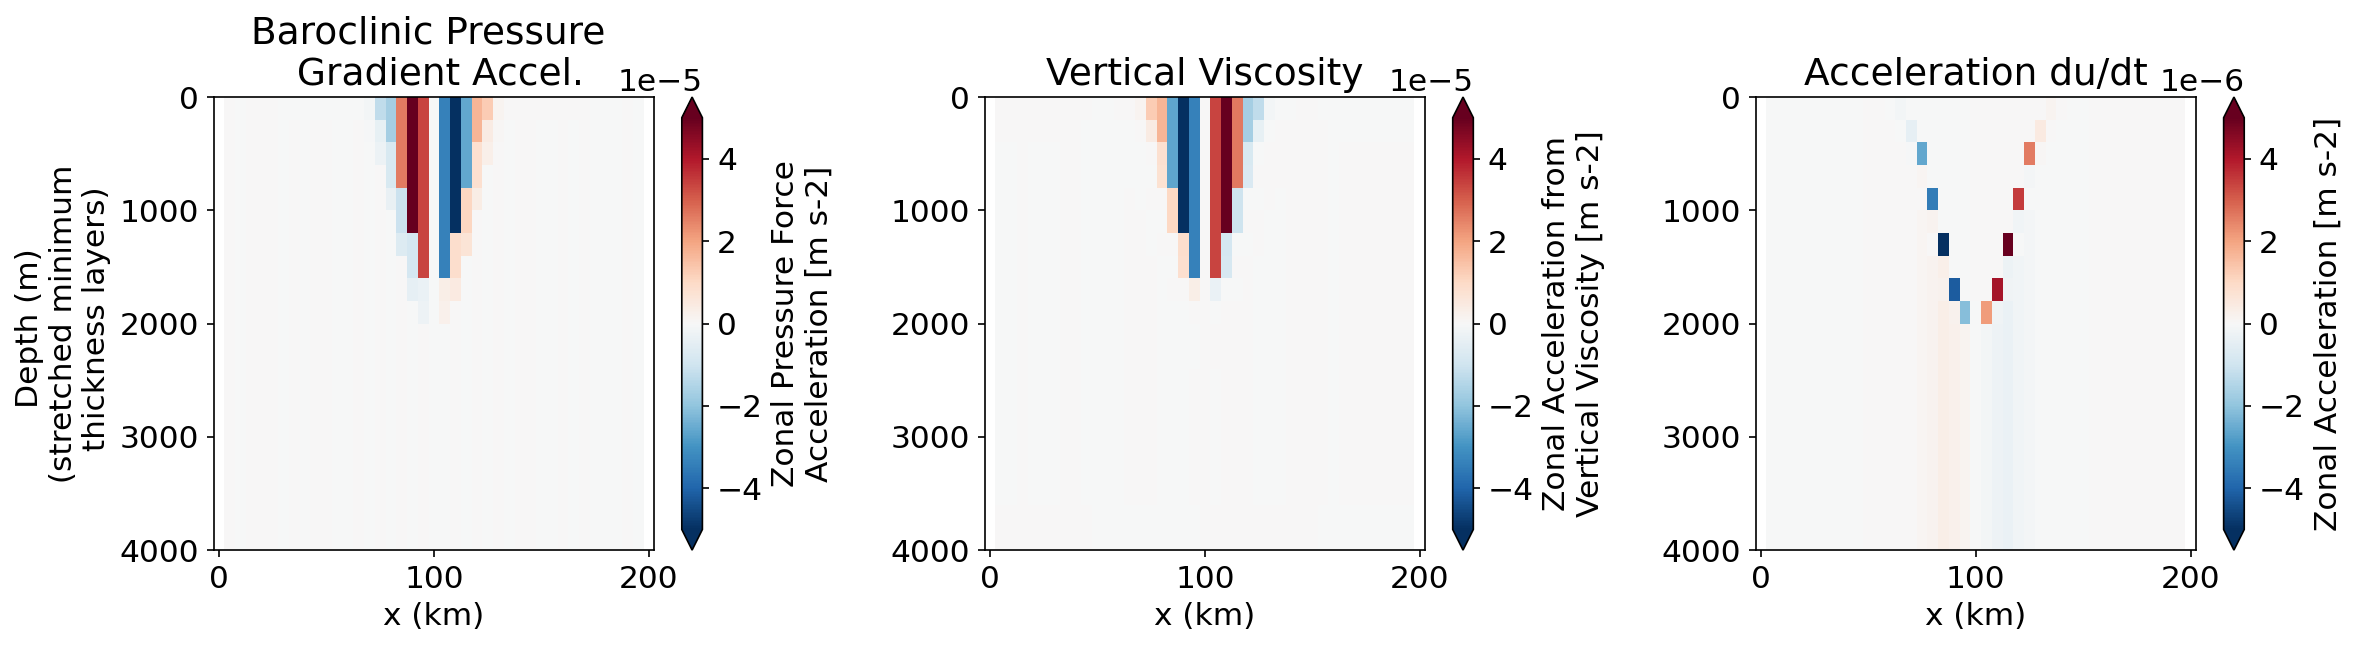

In [17]:
mom1 = xr.open_dataset('mwipg-testing/mom-nomwipg-zstar-short.nc')
plt.rcParams.update({'font.size': 15})


fig, axes = plt.subplots(ncols = 3, figsize = (18,4),dpi = 150)

mom1.PFu.isel(Time = 0,yh=0).plot(ax = axes[0],yincrease = False, vmin = -5e-5, vmax = 5e-5, cmap = 'RdBu_r')
mom1.du_dt_visc.isel(Time = 0,yh=0).plot(ax = axes[1],yincrease = False, vmin = -5e-5, vmax = 5e-5, cmap = 'RdBu_r')
mom1.dudt.isel(Time = 0,yh=0).plot(ax = axes[2],yincrease = False, vmin = -5e-6, vmax = 5e-6, cmap = 'RdBu_r')

axes[0].set_ylabel('Depth (m) \n (stretched minimum \n thickness layers)')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('x (km)')
axes[1].set_xlabel('x (km)')
axes[2].set_xlabel('x (km)')

axes[0].set_title('Baroclinic Pressure \n Gradient Accel.')
axes[1].set_title('Vertical Viscosity')
axes[2].set_title('Acceleration du/dt')

# plot(axes[0],x,time,0,prog.u,"uo",-1e-11,1e-11,cm.cm.balance,ymax)
# plot(axes[1],x,-1,0,prog.u,"uo",-5e-4,5e-4,cm.cm.balance,ymax)

# axes[1].set_ylabel('')
# axes[0].set_title('u, time = 15 min')
# axes[1].set_title('u, time = 10 days')
fig.subplots_adjust(wspace = 0.4)
plt.show()


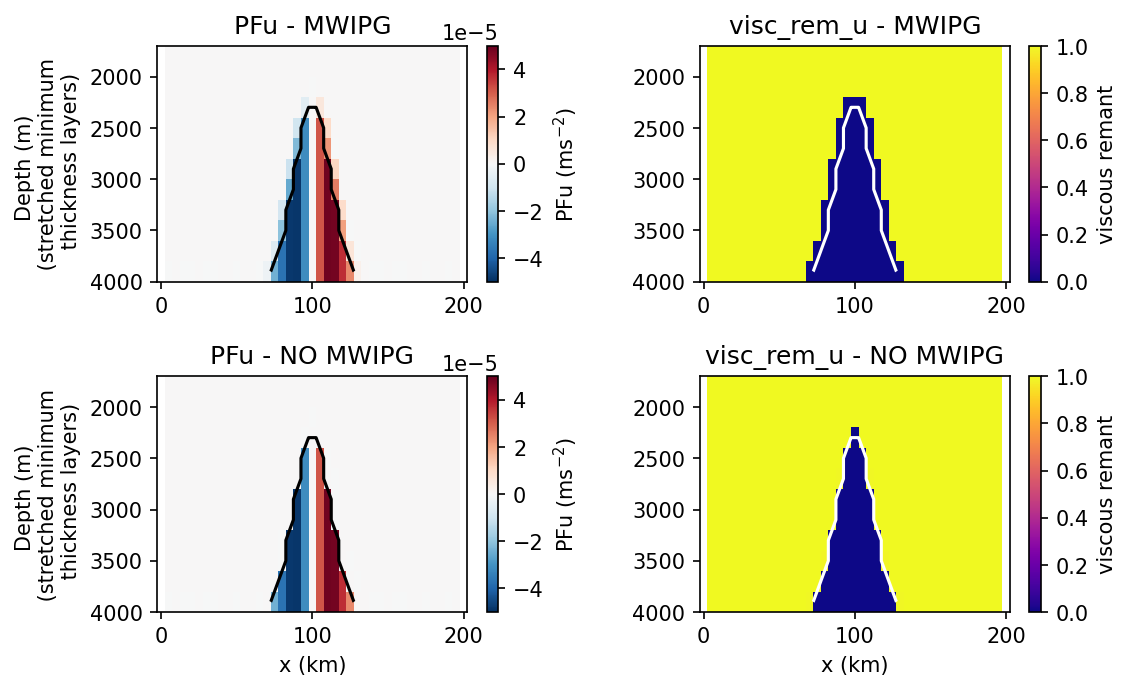

In [20]:
mom1 = xr.open_dataset('mwipg-sm/mom-mwipg.nc')
mom2 = xr.open_dataset('mwipg-sm/mom-nomwipg.nc')
visc1 = xr.open_dataset('mwipg-sm/visc-mwipg.nc')
visc2 = xr.open_dataset('mwipg-sm/visc-nomwipg.nc')
prog1 = xr.open_dataset('mwipg-sm/prog-mwipg.nc')
prog2 = xr.open_dataset('mwipg-sm/prog-nomwipg.nc')

#plt.rcParams.update({'font.size': 15})


fig, axes = plt.subplots(ncols = 2, nrows = 2,figsize = (8,5),dpi = 150)

mom1.PFu.isel(Time = 0,yh=0).plot(ax = axes[0,0],yincrease = False, vmin = -5e-5, vmax = 5e-5, 
                                  cmap = 'RdBu_r', cbar_kwargs = {'label':'PFu (ms$^{-2}$)'})
visc1.visc_rem_u.isel(Time = 0,yh=0).plot(ax = axes[0,1],yincrease = False, 
                                          cmap = 'plasma', cbar_kwargs = {'label':'viscous remant'})
prog1.h.isel(Time = 0,yh=0).plot.contour(ax = axes[0,0],levels= [0.1],colors = 'k')
prog1.h.isel(Time = 0,yh=0).plot.contour(ax = axes[0,1],levels= [0.1],colors = 'w')
axes[0,0].set_ylabel('Depth (m) \n (stretched minimum \n thickness layers)')
axes[0,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,0].set_title('PFu - MWIPG')
axes[0,1].set_title('visc_rem_u - MWIPG')

mom2.PFu.isel(Time = 0,yh=0).plot(ax = axes[1,0],yincrease = False, vmin = -5e-5, vmax = 5e-5, 
                                  cmap = 'RdBu_r', cbar_kwargs = {'label':'PFu (ms$^{-2}$)'})
visc2.visc_rem_u.isel(Time = 0,yh=0).plot(ax = axes[1,1],yincrease = False, 
                                          cmap = 'plasma', cbar_kwargs = {'label':'viscous remant'})
prog2.h.isel(Time = 0,yh=0).plot.contour(ax = axes[1,0],levels= [0.1],colors = 'k', label = 'vanished layers')
#axes[1,0].legend()
prog2.h.isel(Time = 0,yh=0).plot.contour(ax = axes[1,1],levels= [0.1],colors = 'w')
axes[1,0].set_ylabel('Depth (m) \n (stretched minimum \n thickness layers)')
axes[1,1].set_ylabel('')
axes[1,0].set_xlabel('x (km)')
axes[1,1].set_xlabel('x (km)')
axes[1,0].set_title('PFu - NO MWIPG')
axes[1,1].set_title('visc_rem_u - NO MWIPG')


axes[0,0].set_ylim(4000,1700)
axes[1,0].set_ylim(4000,1700)
axes[0,1].set_ylim(4000,1700)
axes[1,1].set_ylim(4000,1700)

# axes[0].set_xlabel('x (km)')
# axes[1].set_xlabel('x (km)')
# axes[2].set_xlabel('x (km)')

# axes[0].set_title('Baroclinic Pressure \n Gradient Accel.')
# axes[1].set_title('Vertical Viscosity')
# axes[2].set_title('Acceleration du/dt')

# plot(axes[0],x,time,0,prog.u,"uo",-1e-11,1e-11,cm.cm.balance,ymax)
# plot(axes[1],x,-1,0,prog.u,"uo",-5e-4,5e-4,cm.cm.balance,ymax)

# axes[1].set_ylabel('')
# axes[0].set_title('u, time = 15 min')
# axes[1].set_title('u, time = 10 days')
fig.subplots_adjust(wspace = 0.4,hspace = 0.4)
plt.show()


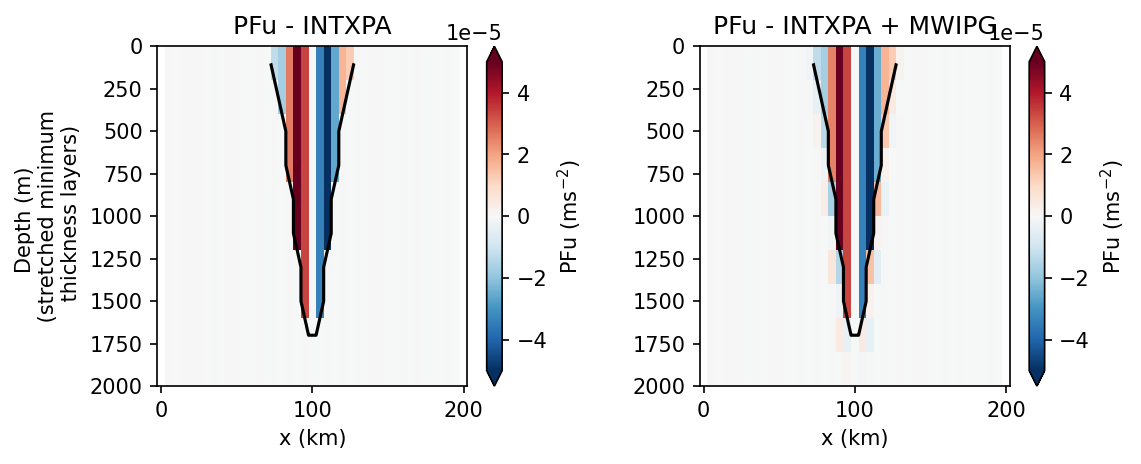

In [28]:
mom1 = xr.open_dataset('intxpa-testing/mom-zstar-minthick1e-12-intxpa.nc')
mom2 = xr.open_dataset('intxpa-testing/mom-zstar-minthick1e-12-intxpa-mwipg.nc')
prog1 = xr.open_dataset('intxpa-testing/prog-zstar-minthick1e-12-intxpa.nc')
prog2 = xr.open_dataset('intxpa-testing/prog-zstar-minthick1e-12-intxpa-mwipg.nc')
# visc1 = xr.open_dataset('mwipg-sm/visc-mwipg.nc')
# visc2 = xr.open_dataset('mwipg-sm/visc-nomwipg.nc')
# prog1 = xr.open_dataset('mwipg-sm/prog-mwipg.nc')
# prog2 = xr.open_dataset('mwipg-sm/prog-nomwipg.nc')

#plt.rcParams.update({'font.size': 15})


fig, axes = plt.subplots(ncols = 2, nrows = 1,figsize = (8,3),dpi = 150)

mom1.PFu.isel(Time = 0,yh=0).plot(ax = axes[0],yincrease = False, vmin = -5e-5, vmax = 5e-5, 
                                  cmap = 'RdBu_r', cbar_kwargs = {'label':'PFu (ms$^{-2}$)'})
# visc1.visc_rem_u.isel(Time = 0,yh=0).plot(ax = axes[0,1],yincrease = False, 
#                                           cmap = 'plasma', cbar_kwargs = {'label':'viscous remant'})
prog1.h.isel(Time = 0,yh=0).plot.contour(ax = axes[0],levels= [0.1],colors = 'k')
# prog1.h.isel(Time = 0,yh=0).plot.contour(ax = axes[0,1],levels= [0.1],colors = 'w')
axes[0].set_ylabel('Depth (m) \n (stretched minimum \n thickness layers)')
axes[0].set_title('PFu - INTXPA')

mom2.PFu.isel(Time = 0,yh=0).plot(ax = axes[1],yincrease = False, vmin = -5e-5, vmax = 5e-5, 
                                  cmap = 'RdBu_r', cbar_kwargs = {'label':'PFu (ms$^{-2}$)'})
prog2.h.isel(Time = 0,yh=0).plot.contour(ax = axes[1],levels= [0.1],colors = 'k')
axes[0].set_xlabel('x (km)')
axes[1].set_xlabel('x (km)')
axes[1].set_title('PFu - INTXPA + MWIPG')
axes[1].set_ylabel('')


axes[0].set_ylim(2000,0)
axes[1].set_ylim(2000,0)
# axes[0,1].set_ylim(4000,1700)
# axes[1,1].set_ylim(4000,1700)

# axes[0].set_xlabel('x (km)')
# axes[1].set_xlabel('x (km)')
# axes[2].set_xlabel('x (km)')

# axes[0].set_title('Baroclinic Pressure \n Gradient Accel.')
# axes[1].set_title('Vertical Viscosity')
# axes[2].set_title('Acceleration du/dt')

# plot(axes[0],x,time,0,prog.u,"uo",-1e-11,1e-11,cm.cm.balance,ymax)
# plot(axes[1],x,-1,0,prog.u,"uo",-5e-4,5e-4,cm.cm.balance,ymax)

# axes[1].set_ylabel('')
# axes[0].set_title('u, time = 15 min')
# axes[1].set_title('u, time = 10 days')
fig.subplots_adjust(wspace = 0.4)
plt.show()
